## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

## NeoWs (Near Earth Object Web Service)

In [30]:
#api_key = "ro8Gqgfrc7R7dpb7JkZhHamQobkjrC7zXdP9ZML8"
#num_paginas = 3
#data = {}
#for n in range(num_paginas):
#    resp = requests.get(f'https://api.nasa.gov/neo/rest/v1/neo/browse?page={n}&api_key={api_key}')
#    json = resp.json()
#    data[n] = json

In [31]:
#data.keys()

dict_keys([0, 1, 2])

In [32]:
#data["page"]

KeyError: 'page'

In [3]:
url = "https://api.nasa.gov/neo/rest/v1/neo/browse?page=1&api_key=ro8Gqgfrc7R7dpb7JkZhHamQobkjrC7zXdP9ZML8"
response = requests.get(url)
data = response.json()

In [4]:
data.keys()

dict_keys(['links', 'page', 'near_earth_objects'])

In [5]:
data["page"]

{'size': 20, 'total_elements': 25983, 'total_pages': 1300, 'number': 1}

### Data Frame simplificado

In [6]:
int_cols = ['id',
           'name',
           'absolute_magnitude_h',
           'is_potentially_hazardous_asteroid']

In [7]:
simp_df = pd.json_normalize(data['near_earth_objects'])
simp_df = simp_df.loc[:,int_cols]
simp_df.head()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),15.22,True
1,2002059,2059 Baboquivari (1963 UA),15.97,False
2,2002061,2061 Anza (1960 UA),16.34,False
3,2002062,2062 Aten (1976 AA),17.10,False
4,2002063,2063 Bacchus (1977 HB),17.25,False


In [8]:
simp_df.describe(include='all')

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
count,20,20,20.000000,20
unique,20,20,NaN,2
top,2002061,2102 Tantalus (1975 YA),NaN,False
freq,1,1,NaN,13
mean,NaN,NaN,16.195500,NaN
std,NaN,NaN,1.649809,NaN
min,NaN,NaN,13.330000,NaN
25%,NaN,NaN,15.165000,NaN
50%,NaN,NaN,16.080000,NaN
75%,NaN,NaN,17.145000,NaN


### Data frame estendido

In [9]:
int_cols = ['id',
           'name',
           'is_potentially_hazardous_asteroid',
           'absolute_magnitude_h']

In [10]:
loc_cols = ['id',
            'name',
            'close_approach_date',
            'absolute_magnitude_h',
            'miss_distance.lunar',
            'is_potentially_hazardous_asteroid']

In [11]:
ext_df = pd.json_normalize(data['near_earth_objects'], 'close_approach_data', int_cols)
ext_df = ext_df.loc[:,loc_cols]
ext_df.head()

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),1902-04-04,15.22,145.881062176,True
1,2001981,1981 Midas (1973 EA),1909-09-01,15.22,175.6949010048,True
2,2001981,1981 Midas (1973 EA),1916-09-24,15.22,60.327178858,True
3,2001981,1981 Midas (1973 EA),1921-03-15,15.22,23.4053786854,True
4,2001981,1981 Midas (1973 EA),1935-09-06,15.22,125.9538932643,True


In [12]:
ext_df.describe(include='all')

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
count,1282,1282,1282,1282.0,1282,1282
unique,20,20,1272,20.0,1282,2
top,2002340,2340 Hathor (1976 UA),2148-09-08,20.2,66.1982759185,False
freq,208,208,2,208.0,1,772


In [13]:
#df = df.astype({"a": int, "b": complex})
ext_df = ext_df.astype({"absolute_magnitude_h": float, "miss_distance.lunar": float})

In [14]:
ext_df.describe(include='all')

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
count,1282,1282,1282,1282.000000,1282.000000,1282
unique,20,20,1272,NaN,NaN,2
top,2002340,2340 Hathor (1976 UA),2148-09-08,NaN,NaN,False
freq,208,208,2,NaN,NaN,772
mean,NaN,NaN,NaN,16.879672,119.533461,NaN
std,NaN,NaN,NaN,1.906227,114.387994,NaN
min,NaN,NaN,NaN,13.330000,1.929798,NaN
25%,NaN,NaN,NaN,15.250000,52.078406,NaN
50%,NaN,NaN,NaN,17.100000,98.762644,NaN
75%,NaN,NaN,NaN,17.480000,154.820356,NaN


## Número de objetos perigosos à Terra

In [15]:
np.where(simp_df['is_potentially_hazardous_asteroid']==True)

(array([ 0,  6,  7,  8,  9, 13, 18]),)

In [16]:
#df.loc[df['column_name'] == some_value]
dang_obj = simp_df.loc[simp_df['is_potentially_hazardous_asteroid']==True]
dang_obj

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
0,2001981,1981 Midas (1973 EA),15.22,True
6,2002101,2101 Adonis (1936 CA),18.64,True
7,2002102,2102 Tantalus (1975 YA),16.01,True
8,2002135,2135 Aristaeus (1977 HA),18.02,True
9,2002201,2201 Oljato (1947 XC),15.25,True
13,2002340,2340 Hathor (1976 UA),20.20,True
18,2003122,3122 Florence (1981 ET3),14.03,True


In [17]:
len(dang_obj)

7

## Média e desvio padrão da distância dos objetos perigosos

In [18]:
dang_obj_id = dang_obj['id'].values
dang_obj_id

array(['2001981', '2002101', '2002102', '2002135', '2002201', '2002340',
       '2003122'], dtype=object)

In [19]:
mean_all = ext_df.groupby('id', as_index=False).mean().drop('absolute_magnitude_h', axis=1)

In [20]:
#dang_obj_mean = ext_df.groupby('id', as_index=False).mean().drop('absolute_magnitude_h', axis=1).loc[mean_all['id'].isin(dang_obj_id)]
dang_obj_mean = mean_all.loc[mean_all['id'].isin(dang_obj_id)]
dang_obj_mean = dang_obj_mean.rename(columns={'miss_distance.lunar': 'mean'})
dang_obj_mean

,id,mean
0,2001981,96.562637
6,2002101,84.069543
7,2002102,117.942623
8,2002135,107.183932
9,2002201,162.238874
13,2002340,82.252267
18,2003122,99.930430


In [21]:
std_all = ext_df.groupby('id', as_index=False).std().drop('absolute_magnitude_h', axis=1)

In [22]:
dang_obj_std = std_all.loc[std_all['id'].isin(dang_obj_id)]
dang_obj_std = dang_obj_std.rename(columns={'miss_distance.lunar': 'std'})
dang_obj_std

,id,std
0,2001981,55.871900
6,2002101,62.350167
7,2002102,53.312520
8,2002135,50.950119
9,2002201,202.362760
13,2002340,59.285876
18,2003122,57.500006


In [23]:
dan_obj_sta = pd.concat([dang_obj, dang_obj_mean['mean'], dang_obj_std['std']], axis=1)
dan_obj_sta

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,mean,std
0,2001981,1981 Midas (1973 EA),15.22,True,96.562637,55.871900
6,2002101,2101 Adonis (1936 CA),18.64,True,84.069543,62.350167
7,2002102,2102 Tantalus (1975 YA),16.01,True,117.942623,53.312520
8,2002135,2135 Aristaeus (1977 HA),18.02,True,107.183932,50.950119
9,2002201,2201 Oljato (1947 XC),15.25,True,162.238874,202.362760
13,2002340,2340 Hathor (1976 UA),20.20,True,82.252267,59.285876
18,2003122,3122 Florence (1981 ET3),14.03,True,99.930430,57.500006


## Aproximação de asteróides perigosos à Terra entre 2000 e 2021

In [24]:
ext_df['close_approach_date'] = pd.to_datetime(ext_df['close_approach_date'])

In [25]:
start_date = '2000-01-01'
end_date = '2021-12-31'
mask = (ext_df['close_approach_date'] > start_date) & (ext_df['close_approach_date'] < end_date)

In [26]:
obj_period = ext_df.loc[mask]
obj_period.head()

,id,name,close_approach_date,absolute_magnitude_h,miss_distance.lunar,is_potentially_hazardous_asteroid
14,2001981,1981 Midas (1973 EA),2006-09-05,15.22,127.307618,True
15,2001981,1981 Midas (1973 EA),2013-09-30,15.22,110.702321,True
16,2001981,1981 Midas (1973 EA),2018-03-21,15.22,34.843489,True
47,2002059,2059 Baboquivari (1963 UA),2017-09-16,15.97,544.341994,False
48,2002059,2059 Baboquivari (1963 UA),2019-10-11,15.97,184.485412,False


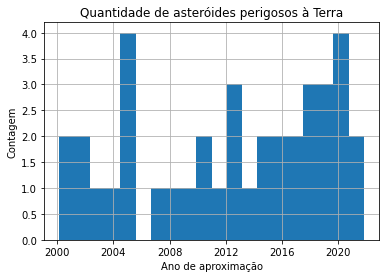

In [27]:
dang_obj_period = obj_period.loc[obj_period['is_potentially_hazardous_asteroid']==True]
dang_obj_period['close_approach_date'].hist(bins=20)
plt.title('Quantidade de asteróides perigosos à Terra')
plt.xlabel('Ano de aproximação')
plt.ylabel('Contagem')
plt.show()

## Histograma dos tamanhos dos objetos perigosos

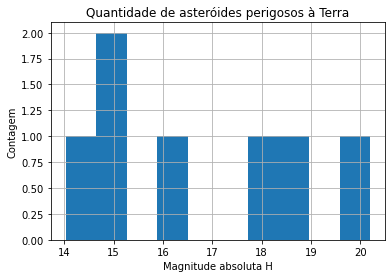

In [28]:
dang_obj['absolute_magnitude_h'].hist(bins=10)
plt.title('Quantidade de asteróides perigosos à Terra')
plt.xlabel('Magnitude absoluta H')
plt.ylabel('Contagem')
plt.show()

## Histograma dos tamanhos dos objetos inofencivos

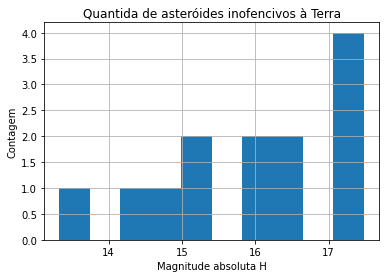

In [29]:
simp_df.loc[-simp_df['id'].isin(dang_obj_id)]['absolute_magnitude_h'].hist(bins=10)
plt.title('Quantida de asteróides inofencivos à Terra')
plt.xlabel('Magnitude absoluta H')
plt.ylabel('Contagem')
plt.show()